<a href="https://colab.research.google.com/github/seosumin/start-github/blob/master/%EB%8B%A8%EB%B3%80%EB%9F%89_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%B6%84%EC%84%9D_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# 강남구 집값 예측 단변량 시계열 분석 데이터

In [80]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(pd.__version__)
# 한글이 깨져서 encodin 지정함 
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/my_lstm/apt_re/aptsellindex_gangnamgu.csv', parse_dates =["date"], index_col ="date", engine='python',encoding='euc-kr', dtype={'trade_price_idx_value':'float'}) 
  
df

1.3.5


,trade_price_idx_value
date,
2006-01-01,74.2
2006-02-01,75.8
2006-03-01,78.1
2006-04-01,81.4
2006-05-01,83.6
...,...
2018-10-01,109.7
2018-12-01,109.3
2019-01-01,108.3


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165 entries, 2006-01-01 to 2019-03-01
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trade_price_idx_value  165 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


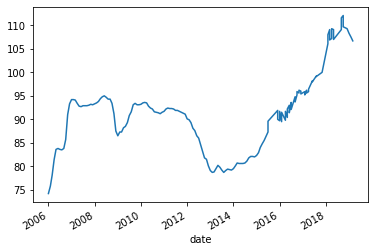

In [76]:
df['trade_price_idx_value'].plot()

In [85]:
# 본 데이터는 달로 이루어져있다. 작년 1년치로 다음년도 1달을 예측하는 모델을 만든다. shift 잘써야함
for s in range(1, 13):
    df['shift_{}'.format(s)] = df['trade_price_idx_value'].shift(s)
df.head(15)

,trade_price_idx_value,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
2006-01-01,74.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-01,75.8,74.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,78.1,75.8,74.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-01,81.4,78.1,75.8,74.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,83.6,81.4,78.1,75.8,74.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-01,83.8,83.6,81.4,78.1,75.8,74.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-01,83.6,83.8,83.6,81.4,78.1,75.8,74.2,NaN,NaN,NaN,NaN,NaN,NaN
2006-08-01,83.5,83.6,83.8,83.6,81.4,78.1,75.8,74.2,NaN,NaN,NaN,NaN,NaN
2006-09-01,83.8,83.5,83.6,83.8,83.6,81.4,78.1,75.8,74.2,NaN,NaN,NaN,NaN


In [89]:
#2016년도 데이터는 날려버리자 아니면 0으로 채우는것도 방법
df = df.dropna()

In [131]:
df

,trade_price_idx_value,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
2007-01-01,94.2,93.3,91.0,85.7,83.8,83.5,83.6,83.8,83.6,81.4,78.1,75.8,74.2
2007-02-01,94.2,94.2,93.3,91.0,85.7,83.8,83.5,83.6,83.8,83.6,81.4,78.1,75.8
2007-03-01,94.1,94.2,94.2,93.3,91.0,85.7,83.8,83.5,83.6,83.8,83.6,81.4,78.1
2007-04-01,93.4,94.1,94.2,94.2,93.3,91.0,85.7,83.8,83.5,83.6,83.8,83.6,81.4
2007-05-01,92.8,93.4,94.1,94.2,94.2,93.3,91.0,85.7,83.8,83.5,83.6,83.8,83.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-01,109.7,112.1,111.6,109.1,107.0,109.1,109.3,107.2,106.9,109.1,108.0,106.1,100.0
2018-12-01,109.3,109.7,112.1,111.6,109.1,107.0,109.1,109.3,107.2,106.9,109.1,108.0,106.1
2019-01-01,108.3,109.3,109.7,112.1,111.6,109.1,107.0,109.1,109.3,107.2,106.9,109.1,108.0


In [132]:
# 2017/1/1 까지의 데이터를 트레이닝셋.
# 2018/1/1 데이터를 valid셋으로 한다.
# 이후는 테스트
split_date = pd.Timestamp('01-01-2017')
test_split = pd.Timestamp('01-01-2018')
train = df.loc[:split_date, ]
valid = df.loc[split_date:test_split,]
test = df.loc[test_split:, ]


In [133]:
# 2016년도 데이터는 날려버리자 그리고 x,y
X_train = train.drop('trade_price_idx_value', axis=1)
y_train = train.loc[:,['trade_price_idx_value']]

X_valid = valid.drop('trade_price_idx_value', axis=1)
y_valid = valid.loc[:,['trade_price_idx_value']]


X_test = test.drop('trade_price_idx_value', axis=1)
y_test = test.loc[:,['trade_price_idx_value']]



X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,
2007-01-01,93.3,91.0,85.7,83.8,83.5,83.6,83.8,83.6,81.4,78.1,75.8,74.2
2007-02-01,94.2,93.3,91.0,85.7,83.8,83.5,83.6,83.8,83.6,81.4,78.1,75.8
2007-03-01,94.2,94.2,93.3,91.0,85.7,83.8,83.5,83.6,83.8,83.6,81.4,78.1
2007-04-01,94.1,94.2,94.2,93.3,91.0,85.7,83.8,83.5,83.6,83.8,83.6,81.4
2007-05-01,93.4,94.1,94.2,94.2,93.3,91.0,85.7,83.8,83.5,83.6,83.8,83.6


In [136]:
#스케일링
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(X_train)
valid_sc = sc.transform(X_valid)
test_sc = sc.transform(X_test)
train_sc

array([[0.83428571, 0.70285714, 0.40697674, ..., 0.        , 0.        ,
        0.        ],
       [0.88571429, 0.83428571, 0.71511628, ..., 0.19526627, 0.11979167,
        0.07692308],
       [0.88571429, 0.88571429, 0.84883721, ..., 0.32544379, 0.29166667,
        0.1875    ],
       ...,
       [0.96571429, 0.98285714, 0.95930233, ..., 0.83431953, 0.76041667,
        0.84134615],
       [1.        , 0.96571429, 1.        , ..., 0.8816568 , 0.85416667,
        0.77884615],
       [0.98857143, 1.        , 0.98255814, ..., 0.78698225, 0.89583333,
        0.86538462]])

In [137]:
#데이터 프레임으로 다시 보자
train_sc_df = pd.DataFrame(train_sc, columns=list(X_train), index=train.index)
valid_sc_df = pd.DataFrame(valid_sc, columns=list(X_train), index=valid.index)
test_sc_df = pd.DataFrame(test_sc, columns=list(X_train), index=test.index)
train_sc_df.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,
2007-01-01,0.834286,0.702857,0.406977,0.296512,0.290909,0.300613,0.312883,0.300613,0.165644,0.000000,0.000000,0.000000
2007-02-01,0.885714,0.834286,0.715116,0.406977,0.309091,0.294479,0.300613,0.312883,0.300613,0.195266,0.119792,0.076923
2007-03-01,0.885714,0.885714,0.848837,0.715116,0.424242,0.312883,0.294479,0.300613,0.312883,0.325444,0.291667,0.187500
2007-04-01,0.880000,0.885714,0.901163,0.848837,0.745455,0.429448,0.312883,0.294479,0.300613,0.337278,0.406250,0.346154
2007-05-01,0.840000,0.880000,0.901163,0.901163,0.884848,0.754601,0.429448,0.312883,0.294479,0.325444,0.416667,0.451923


In [141]:
# numpy 값으로 변환
print(type(train_sc_df))
X_train = train_sc_df.values

X_valid= valid_sc_df.values

X_test= test_sc_df.values


print(X_train.shape)
#print(X_train)
print(y_train.shape)
#print(y_train)

<class 'pandas.core.frame.DataFrame'>
(125, 12)
(125, 1)


In [159]:
X_train

(125, 12)

In [ ]:
# 최종 데이터 입력 형태 확인
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_valid_t = X_valid.reshape(X_valid.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

In [143]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Dense, LSTM


from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



In [144]:
print(X_train_t.shape)

(125, 12, 1)


In [145]:
clear_session()
    
model = Sequential() # Sequeatial Model 
model.add(LSTM(64, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(32, activation='relu')) # output = 1 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


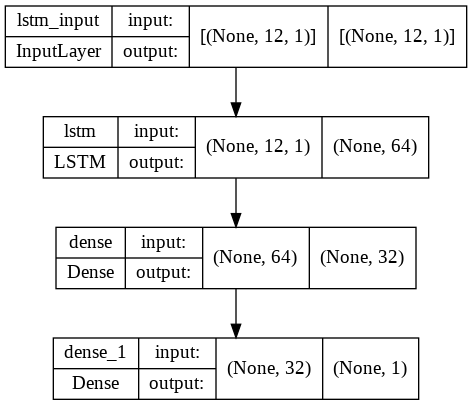

In [146]:
plot_model(model, show_shapes=True)

In [147]:
X_valid_t.shape

(12, 12, 1)

In [149]:
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

model.fit(X_train_t, y_train, validation_data=(X_valid_t, y_valid),
          epochs=1000,
          batch_size=30, verbose=1, callbacks=[es])

Epoch 1/1000
5/5 [==============================] - 0s 26ms/step - loss: 28.6599 - val_loss: 73.4066
Epoch 2/1000
5/5 [==============================] - 0s 16ms/step - loss: 28.6581 - val_loss: 73.4216
Epoch 3/1000
5/5 [==============================] - 0s 16ms/step - loss: 28.6639 - val_loss: 73.3245
Epoch 4/1000
5/5 [==============================] - 0s 15ms/step - loss: 28.6513 - val_loss: 73.8818
Epoch 5/1000
5/5 [==============================] - 0s 18ms/step - loss: 28.6654 - val_loss: 74.8729
Epoch 6/1000
5/5 [==============================] - 0s 16ms/step - loss: 28.6514 - val_loss: 75.3022
Epoch 7/1000
5/5 [==============================] - 0s 16ms/step - loss: 28.6490 - val_loss: 75.5826
Epoch 8/1000
5/5 [==============================] - 0s 15ms/step - loss: 28.6537 - val_loss: 75.8211
Epoch 9/1000
5/5 [==============================] - 0s 16ms/step - loss: 28.6517 - val_loss: 75.9024
Epoch 10/1000
5/5 [==============================] - 0s 16ms/step - loss: 28.6552 - val_los

In [150]:
score = model.evaluate(X_test_t, y_test, batch_size=30)
print(score)

1/1 [==============================] - 0s 28ms/step - loss: 381.9050
381.905029296875


In [151]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred=model.predict(X_test_t)

In [165]:
y_pred

array([[89.08756 ],
       [89.087326],
       [89.08774 ],
       [89.08752 ],
       [89.08763 ],
       [89.08782 ],
       [89.0885  ],
       [89.08844 ],
       [89.08889 ],
       [89.08885 ],
       [89.08919 ],
       [89.08922 ],
       [89.09142 ],
       [89.09209 ],
       [89.09245 ],
       [89.09169 ]], dtype=float32)

In [180]:
r2_score(y_test, y_pred)

-140.78271529595577

# 딥러닝 성능은 평균보다 구리다

In [167]:
# 불러오기
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = XGBRegressor()
eval_set = [(X_valid, y_valid)]
model.fit(X_train, y_train, eval_metric='rmse', eval_set=eval_set, verbose=True)

In [188]:
y_test_pred=model.predict(X_test)
y_test_pred

array([93.85514, 93.85514, 93.85514, 93.85514, 93.85514, 93.85514,
       93.85514, 93.85514, 93.85514, 93.85514, 93.85514, 93.85514,
       93.85514, 93.85514, 93.85514, 93.85514], dtype=float32)

In [189]:
y_test

array([[106.1],
       [108. ],
       [109.1],
       [106.9],
       [107.2],
       [109.3],
       [109.1],
       [107. ],
       [109.1],
       [111.6],
       [112.1],
       [109.7],
       [109.3],
       [108.3],
       [107.5],
       [106.7]])

In [190]:
r2_score(y_test, y_test_pred)

-80.30402431326881

# 그나마 머신러닝이 좀 낫다.

# 시계열에서는 shift 하는 방법과, 인풋 shape를 좀더 생각해봐야 할 듯 하다. 

# 다변량 분석도 결국은 shift를 얼마나 할지의 문제인듯?!

# reshape input to be 3D [samples, timesteps, features] 딥러닝 시계열에서는 3차원으로 입력을 주어야하는데, 데이터의 수, 시계열, 피처의 수 이렇게 3차원으로 들어가야 한다.

# 만약 다중 데이터 다변량 분석이 문제로 나오면.. 그냥 포기하자